In [33]:
import numpy as np
from numpy import log, log10, log2, e, pi, sqrt
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [139]:
E, N, x, NE, mu = np.loadtxt('../data/xNsweep/parameters.dat', unpack=1)
nx = 20
nN = 15
E0true = -1/pi

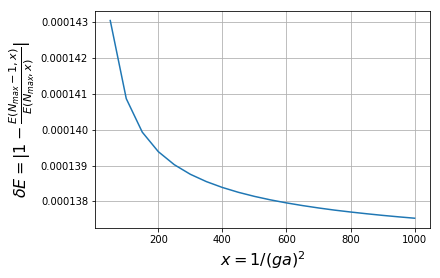

In [140]:
# Convergence in N. We want to make sure that for each x, the energy for the largest N is sufficiently close
# to the energy in the N -> infty limit. We check this by comparing the relative deviation between the last 
# two N values to a threshold
#tol = 1.5e-4
Nconv = []
for i in range(nx):
    Nconv.append((E[nx*(nN-1)+i]-E[nx*(nN-2)+i])/E[nx*(nN-1)+i])
plt.plot(x[:nx], Nconv); 
plt.xlabel(r"$x = 1/(ga)^2$", size=16)
plt.ylabel(r"$\delta E = \left|1-\frac{E(N_{max}-1,x)}{E(N_{max},x)}\right|$", size=16)
#plt.hlines(tol,50,1000,linestyles='--', label='0.015%')
#plt.legend()
plt.grid()
plt.show()

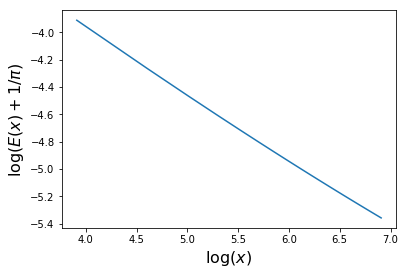

In [141]:
# Having checked that the convergence is good, we will select the energy for the largest lattice size N for
# for every x. This is a quick alternative to extrapolating the N convergence to infinity.

Ex = E[nx*(nN-1):]
plt.plot(log(x[:nx]),log(Ex2-E0true))
plt.xlabel(r"$\log(x)$", size=16)
plt.ylabel(r"$\log(E(x)+1/\pi)$",size=16)
plt.show()

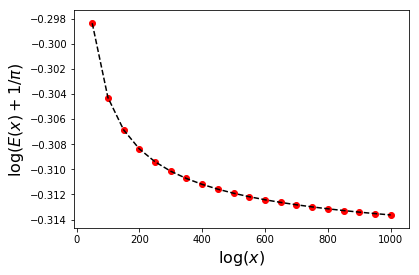

In [142]:
# More rigorously, let's fit the x convergence to a power law with three parameters,
# a power, a constant factor and a constant offset. The offset is the energy estimate.

def lin(x,a,b): return a*x + b
def plaw(x,a,b,c): return b*x**a + c
popt,pcov = curve_fit(plaw, xdata=x[:nx], ydata=Ex,  p0=[-1,0,0])
plt.plot(x[:nx], list(map(lambda x: plaw(x,*popt),x[:nx])), 'k--')
plt.scatter(x[:nx],Ex, c='r')
plt.xlabel(r"$\log(x)$", size=16)
plt.ylabel(r"$\log(E(x)+1/\pi)$",size=16)
plt.show()

#E0true = -1
#popt,pcov = curve_fit(lin, xdata=log(x[:nx]), ydata=log(Ex-E0true))
#plt.plot(log(x[:nx]), list(map(lambda x: lin(x,*popt),log(x[:nx]))), 'k')
#plt.scatter(log(x[:nx]),log(Ex-E0true))
#plt.xlabel(r"$\log(x)$", size=16)
#plt.ylabel(r"$\log(E(x)+1/\pi)$",size=16)
#plt.show()

In [143]:
print("Energy from fit=%.12f"%popt[2])
print("Energy, true=%.12f"%E0true)
print("Deviation from true=%.12f"%(abs((popt[2]-E0true)/E0true)))

Energy from fit=-0.317482483602
Energy, true=-0.318309886184
Deviation from true=0.002599361872


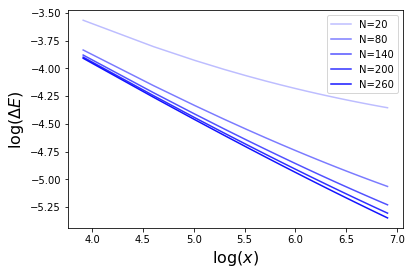

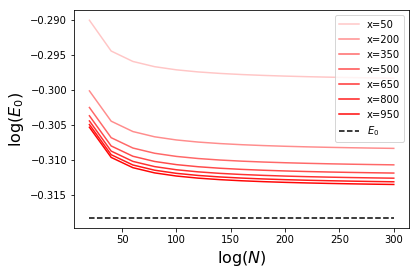

In [144]:
[plt.plot(log(x[20*i: 20*(i+1)]), log(1/pi + E[20*i: 20*(i+1)]), 'b', alpha=np.sqrt((i+1)/15), label="N=%d"%(N[nx*i])) for i in range(0,15,3)]; 
plt.legend()
plt.xlabel(r"$\log(x)$", size=16)
plt.ylabel(r"$\log(\Delta E)$",size=16)
plt.show()
[plt.plot(N[i::20], E[i::20], 'r', alpha=np.sqrt((i+1)/20), label="x=%d"%(x[i])) for i in range(0,20,3)]; 
plt.hlines(E0true,20,300,linestyles='--', label=r"$E_0$")
plt.legend()
plt.xlabel(r"$\log(N)$", size=16)
plt.ylabel(r"$\log(E_0)$", size=16)
plt.show()

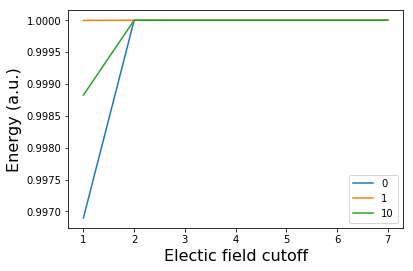

In [188]:
# Experiment 1: How does energy depend on cutoff for N=300, x=1000, m=0 (i.e. massless, close to bulk continuum)?
E, N, x, NE, mu = np.loadtxt('../data/cutoffetc/parameters.dat', unpack=1)

masses = [0,1,10]
NEs    = [1,2,3,5,7]
[plt.plot(NEs,E[5+9*i::27]/E[5+9*i::27][-1], label='%d'%masses[i]) for i in range(3)]
plt.xlabel("Electic field cutoff", size=16)
plt.ylabel("Energy (a.u.)", size=16)
plt.legend()
plt.show()

In [187]:
[print(E[i::27]) for i in range(27)]

[-0.30223265 -0.30243816 -0.30243816 -0.30243816 -0.30243816]
[-0.3151917  -0.31630437 -0.31630613 -0.31630613 -0.31630613]
[-0.31462606 -0.31558989 -0.31559012 -0.31559012 -0.31559012]
[-0.30340544 -0.30361497 -0.30361497 -0.30361497 -0.30361497]
[-0.31637055 -0.31749971 -0.31750148 -0.31750148 -0.31750148]
[-0.31580477 -0.31678721 -0.31678745 -0.31678745 -0.31678745]
[-0.29813084 -0.29832415 -0.29832415 -0.29832415 -0.29832415]
[-0.31110786 -0.31221504 -0.31221528 -0.31221528 -0.31221528]
[-0.31053827 -0.31151998 -0.31152009 -0.31152009 -0.31152009]
[-0.038142 -0.038142 -0.038142 -0.038142 -0.038142]
[-0.20653436 -0.20655064 -0.20655064 -0.20655064 -0.20655064]
[-0.13675148 -0.13675179 -0.13675179 -0.13675179 -0.13675179]
[-0.03839582 -0.03839582 -0.03839582 -0.03839582 -0.03839582]
[-0.20758764 -0.2076044  -0.2076044  -0.2076044  -0.2076044 ]
[-0.13755542 -0.13755574 -0.13755574 -0.13755574 -0.13755574]
[-0.03725362 -0.03725362 -0.03725362 -0.03725362 -0.03725362]
[-0.20284786 -0.20

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [192]:
# Now we show how the Schmidt spectrum looks for a selection of different parameter settings. This is
# to verify validity of using a field cutoff (or find a regime where the cutoff is invalid)
# TODO


# We will plot out some observable expectation values along the chain
obs = np.loadtxt('../data/cutoffetc/outputs_NE7_mg0_N300_x1000_gauss', unpack=1)

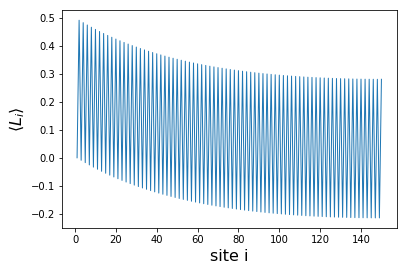

In [201]:
plt.plot(obs[0,:150]/2, obs[3,:150], linewidth=1); 
plt.xlabel("site i", size=16)
plt.ylabel(r"$\langle L_i \rangle$", size=16)
plt.show()